#  **Import libraries**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd                                      # Importing pandas library and creating its instance as pd
import numpy as np                                       # Importing numpy library and creating its instance as np
import matplotlib.pyplot as plt                          # Importing matplotlib.pyplot library and creating its instance as plt


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier


#  **Reading my data from players_20.csv file**

In [ ]:
# reading csv file and assigning it to df20
df20 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_20.csv')

In [ ]:
# Viewing the head of the dataset df20
df20.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [ ]:
#View the shape of the dataset df20
df20.shape


(18278, 104)

In [ ]:
#player important attributes
columns = ['sofifa_id','age','potential','overall','attacking_crossing','value_eur','nationality',
                'club' ,'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
           'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
           'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
           'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
           'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
           'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking',
           'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
           'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
df20 = df20[columns]
df20.head()


,sofifa_id,age,potential,overall,attacking_crossing,value_eur,nationality,club,attacking_finishing,attacking_heading_accuracy,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,94,94,88,95500000,Argentina,FC Barcelona,95,70,...,75,96,33,37,26,6,11,15,14,8
1,20801,34,93,93,84,58500000,Portugal,Juventus,94,89,...,85,95,28,32,24,7,11,15,14,11
2,190871,27,92,92,87,105500000,Brazil,Paris Saint-Germain,87,62,...,90,94,27,26,29,9,9,15,15,11
3,200389,26,93,91,13,77500000,Slovenia,Atlético Madrid,11,15,...,11,68,27,12,18,87,92,78,90,89
4,183277,28,91,91,81,90000000,Belgium,Real Madrid,84,61,...,88,91,34,27,22,11,12,6,8,8


#  **Data preparation**
# Demonstrate the data preparation & feature extraction processes
# Using [data munging, encoding, scaling, feature importance] to prepare data for models

In [ ]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   sofifa_id                   18278 non-null  int64 
 1   age                         18278 non-null  int64 
 2   potential                   18278 non-null  int64 
 3   overall                     18278 non-null  int64 
 4   attacking_crossing          18278 non-null  int64 
 5   value_eur                   18278 non-null  int64 
 6   nationality                 18278 non-null  object
 7   club                        18278 non-null  object
 8   attacking_finishing         18278 non-null  int64 
 9   attacking_heading_accuracy  18278 non-null  int64 
 10  attacking_short_passing     18278 non-null  int64 
 11  attacking_volleys           18278 non-null  int64 
 12  skill_dribbling             18278 non-null  int64 
 13  skill_curve                 18278 non-null  in

In [ ]:
# Checking from our data set we have 18278  in all columns of attributes of the player hence
#we dont have to worry about now values

In [ ]:
df20.describe()

,sofifa_id,age,potential,overall,attacking_crossing,value_eur,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,71.546887,66.244994,49.718405,2.484038e+06,45.590218,52.221468,58.748003,42.809388,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.139669,6.949953,18.325403,5.585481e+06,19.594609,17.428429,14.679653,17.701815,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,49.000000,48.000000,5.000000,0.000000e+00,2.000000,5.000000,7.000000,3.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,67.000000,62.000000,38.000000,3.250000e+05,30.000000,44.000000,54.000000,30.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,71.000000,66.000000,54.000000,7.000000e+05,49.000000,56.000000,62.000000,44.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,75.000000,71.000000,64.000000,2.100000e+06,62.000000,64.000000,68.000000,56.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,95.000000,94.000000,93.000000,1.055000e+08,95.000000,93.000000,92.000000,90.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [ ]:
# This means that we dont have duplicates duplicates rows
df20["sofifa_id"].duplicated().sum()

0

In [ ]:
df20.isna().any()

sofifa_id                     False
age                           False
potential                     False
overall                       False
attacking_crossing            False
value_eur                     False
nationality                   False
club                          False
attacking_finishing           False
attacking_heading_accuracy    False
attacking_short_passing       False
attacking_volleys             False
skill_dribbling               False
skill_curve                   False
skill_fk_accuracy             False
skill_long_passing            False
skill_ball_control            False
movement_acceleration         False
movement_sprint_speed         False
movement_agility              False
movement_reactions            False
movement_balance              False
power_shot_power              False
power_jumping                 False
power_stamina                 False
power_strength                False
power_long_shots              False
mentality_aggression        

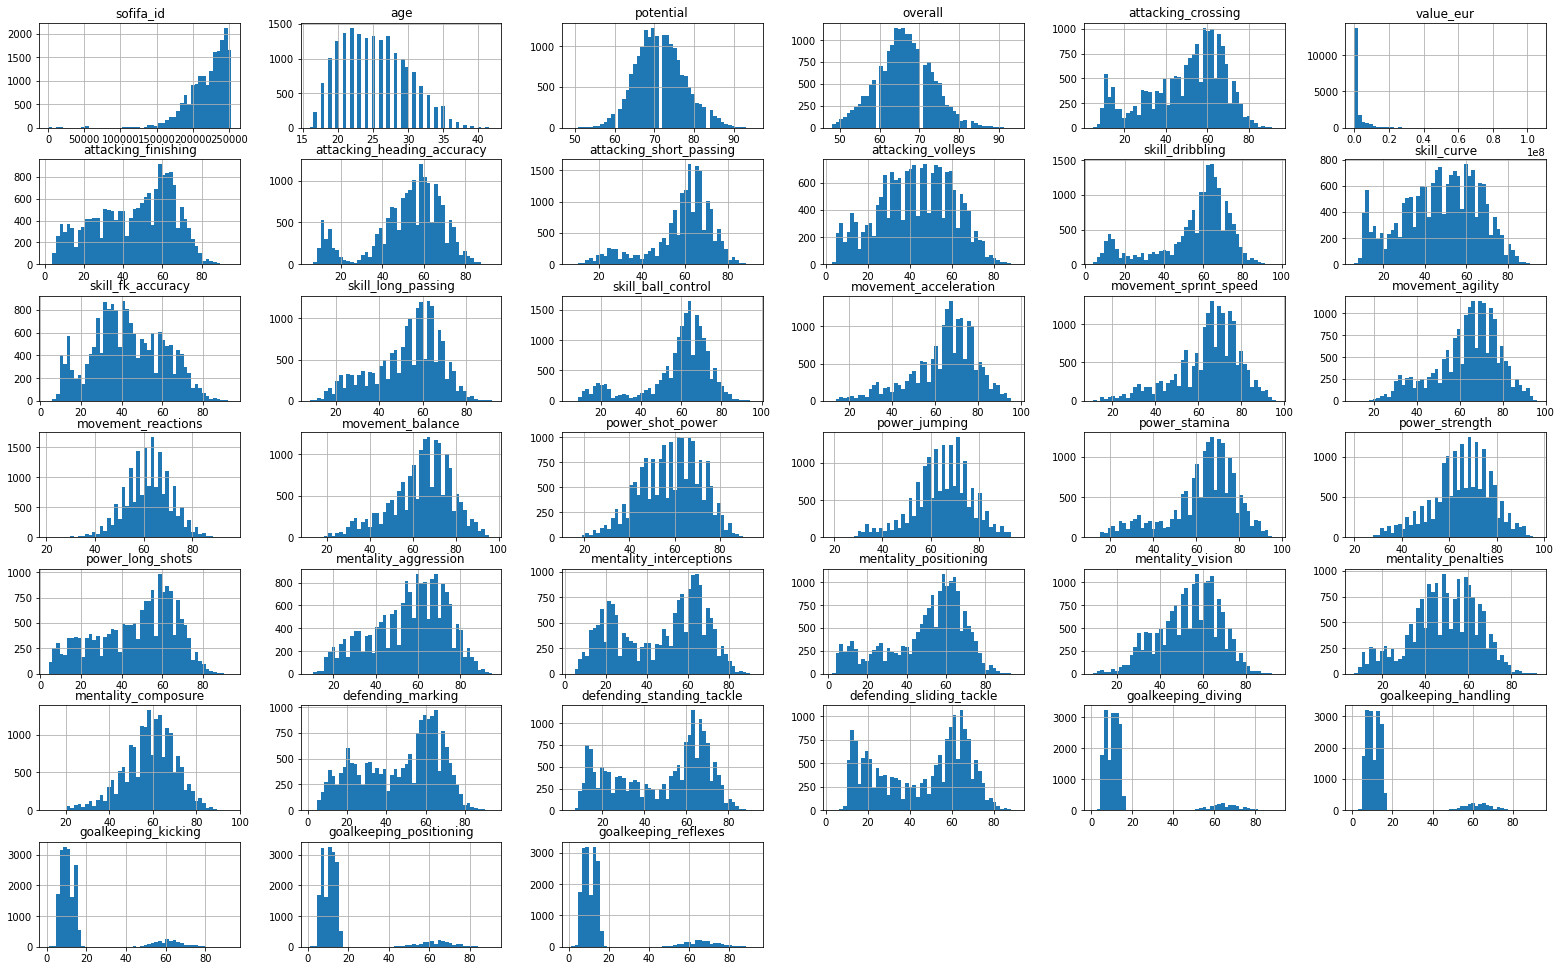

In [ ]:

df20.hist(bins=50, figsize=(27,17))
plt.show()

In [ ]:
#Viewing mean,standard_deviation,minimum,first_quartile,second_quartile,third_quartile and maximum values of our player attributes
df20.describe()

,sofifa_id,age,potential,overall,attacking_crossing,value_eur,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,71.546887,66.244994,49.718405,2.484038e+06,45.590218,52.221468,58.748003,42.809388,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.139669,6.949953,18.325403,5.585481e+06,19.594609,17.428429,14.679653,17.701815,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,49.000000,48.000000,5.000000,0.000000e+00,2.000000,5.000000,7.000000,3.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,67.000000,62.000000,38.000000,3.250000e+05,30.000000,44.000000,54.000000,30.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,71.000000,66.000000,54.000000,7.000000e+05,49.000000,56.000000,62.000000,44.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,75.000000,71.000000,64.000000,2.100000e+06,62.000000,64.000000,68.000000,56.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,95.000000,94.000000,93.000000,1.055000e+08,95.000000,93.000000,92.000000,90.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [ ]:
#Viewing the number ofclubs on the dataset
pd.crosstab(index=df20["club"],columns="count",dropna=True)

col_0,count
club,
SSV Jahn Regensburg,25
1. FC Heidenheim 1846,29
1. FC Kaiserslautern,28
1. FC Köln,31
1. FC Magdeburg,24
...,...
Zagłębie Lubin,25
Çaykur Rizespor,23
Örebro SK,27


#  **Correlations in our dataset**


# Creating feature subsets and picking important features which show maximum correlation with the dependent variable.

In [ ]:
#Viewing the number ofclubs on the dataset
df20.corr()

,sofifa_id,age,potential,overall,attacking_crossing,value_eur,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.736680,0.042015,-0.445061,-0.137097,-0.159848,-0.098612,-0.120116,-0.146427,-0.166148,...,-0.147125,-0.385061,-0.131479,-0.087414,-0.068464,-0.113073,-0.116270,-0.114658,-0.123064,-0.113487
age,-0.736680,1.000000,-0.262872,0.464305,0.128189,0.081513,0.078531,0.149946,0.135681,0.143063,...,0.141375,0.370149,0.157007,0.116857,0.101534,0.110313,0.112929,0.112615,0.121381,0.111811
potential,0.042015,-0.262872,1.000000,0.646650,0.240263,0.580868,0.244240,0.206082,0.366478,0.256126,...,0.224729,0.444101,0.167209,0.145207,0.129093,-0.049662,-0.050859,-0.056216,-0.049007,-0.050985
overall,-0.445061,0.464305,0.646650,1.000000,0.389078,0.638230,0.342372,0.345784,0.503157,0.394152,...,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
attacking_crossing,-0.137097,0.128189,0.240263,0.389078,1.000000,0.250012,0.669081,0.476990,0.810796,0.695453,...,0.654811,0.598011,0.451027,0.431927,0.412995,-0.665124,-0.663571,-0.662655,-0.663568,-0.665659
value_eur,-0.159848,0.081513,0.580868,0.638230,0.250012,1.000000,0.252399,0.192478,0.333462,0.283819,...,0.234947,0.457112,0.154734,0.125180,0.102949,-0.022094,-0.022119,-0.023048,-0.020554,-0.021607
attacking_finishing,-0.098612,0.078531,0.244240,0.342372,0.669081,0.252399,1.000000,0.487541,0.673158,0.891961,...,0.847101,0.568326,0.038772,-0.014762,-0.053809,-0.593162,-0.591540,-0.588609,-0.589306,-0.591220
attacking_heading_accuracy,-0.120116,0.149946,0.206082,0.345784,0.476990,0.192478,0.487541,1.000000,0.658721,0.519260,...,0.567860,0.540732,0.589378,0.564669,0.537327,-0.748714,-0.748099,-0.744995,-0.744403,-0.748527
attacking_short_passing,-0.146427,0.135681,0.366478,0.503157,0.810796,0.333462,0.673158,0.658721,1.000000,0.704835,...,0.687828,0.717620,0.580156,0.555009,0.522307,-0.735895,-0.735133,-0.731616,-0.730744,-0.735670
attacking_volleys,-0.166148,0.143063,0.256126,0.394152,0.695453,0.283819,0.891961,0.519260,0.704835,1.000000,...,0.839344,0.620341,0.129128,0.082132,0.043186,-0.595148,-0.593584,-0.590003,-0.590405,-0.593034


In [ ]:
#Viewing the correlation of overall with other attributes in ascending order
corr_matrix=df20.corr()
corr_matrix["overall"].sort_values(ascending=False)

overall                       1.000000
movement_reactions            0.864526
mentality_composure           0.719992
potential                     0.646650
value_eur                     0.638230
power_shot_power              0.567504
mentality_vision              0.509251
attacking_short_passing       0.503157
skill_long_passing            0.487289
age                           0.464305
skill_ball_control            0.457052
power_long_shots              0.425081
skill_curve                   0.415521
mentality_aggression          0.399434
attacking_volleys             0.394152
skill_fk_accuracy             0.389790
attacking_crossing            0.389078
skill_dribbling               0.370639
power_stamina                 0.370344
power_strength                0.361543
mentality_positioning         0.356025
mentality_penalties           0.347950
attacking_heading_accuracy    0.345784
attacking_finishing           0.342372
mentality_interceptions       0.315582
defending_marking        

# The correlation above shows that they is direct positive relationship overall rating from movement_reactions up to movement balane with the least correlation with overall rating. They is an inverse relationhip between overall rating and goalkeeping_positioning up to goalkeeping_kicking. Without considering sofifa_id because it does not affect overall_rating

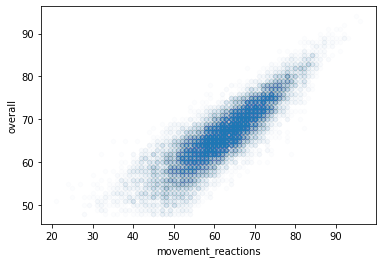

In [ ]:
df20.plot(kind="scatter",x="movement_reactions",y="overall",alpha=0.01)

# The graph above shows a direct relationship between overall rating and movement_reactions

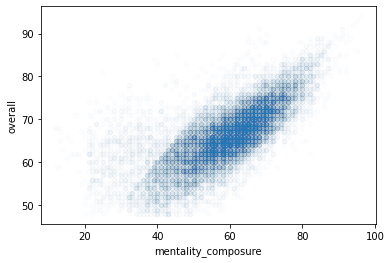

In [ ]:
df20.plot(kind="scatter",x="mentality_composure",y="overall",alpha=0.01)

# The graph above shows a direct relationship between overall rating and mentality_composure

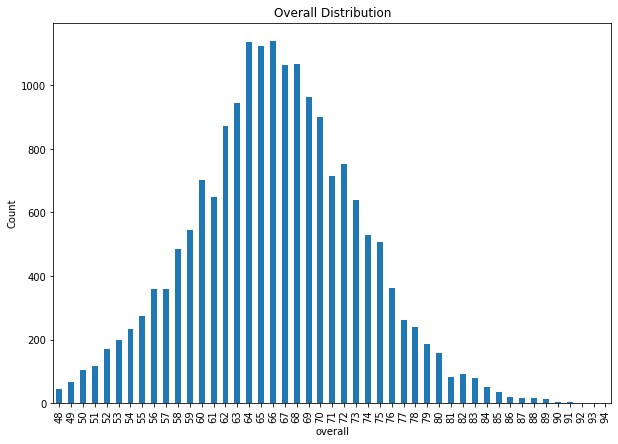

In [ ]:

overall = df20.groupby(df20['overall']).count().age
overall.plot.bar(figsize=(10,7))
plt.ylabel('Count')
plt.title('Overall Distribution')
plt.rcParams["figure.figsize"] = (10,10)
#Viweing a bar graph of age against overall rating
plt.show()

# The graph above shows a normal distribution of count of overall rating with respect to age

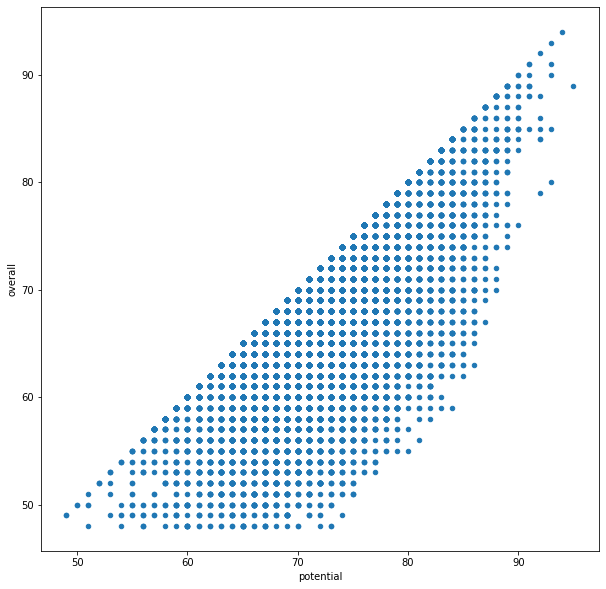

In [ ]:
#Plotting graph of  overall against potential
df20.plot(kind="scatter",x="potential",y="overall")

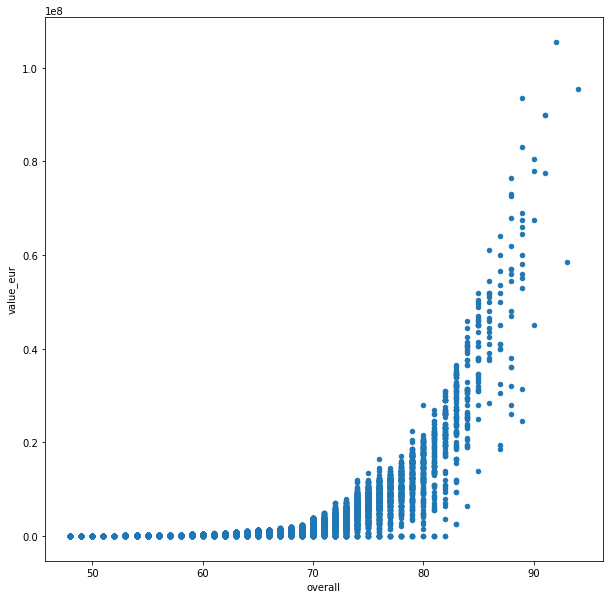

In [ ]:
#Plotting graph of  overall against value_eur
df20.plot(kind="scatter",x="overall",y="value_eur")

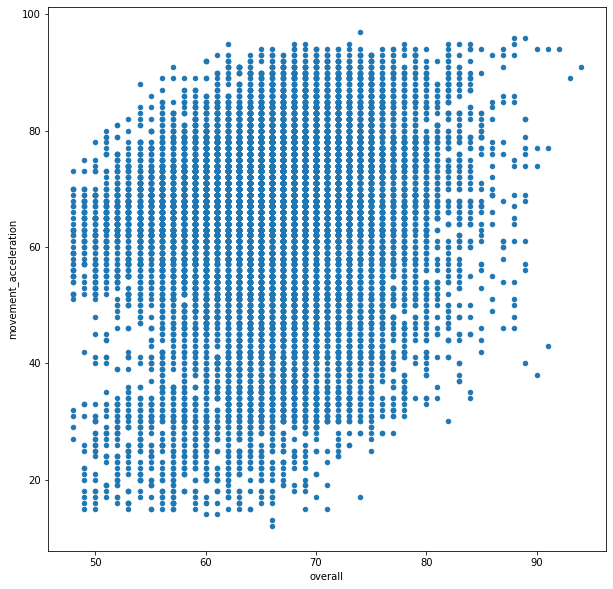

In [ ]:
#Plotting graph of  overall against movement_acceleration

df20.plot(kind="scatter",x="overall",y="movement_acceleration")

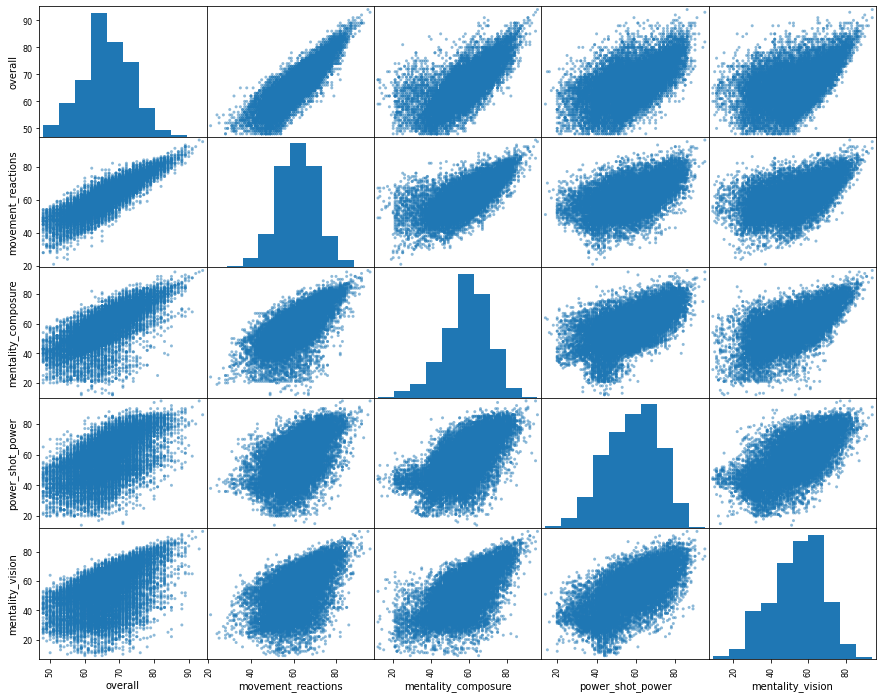

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["overall", "movement_reactions", "mentality_composure", "power_shot_power", "mentality_vision"]
scatter_matrix(df20[attributes], figsize=(15,12))
plt.show()


In [ ]:
# Drop sofifa_id attribute because it doesn't affect the rating of a player its just a label representing each player uniquely
df20=df20.drop("sofifa_id", axis=1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer             #importing LabelBinarizer
encoder = LabelBinarizer()                                   #Creating an instance of LabelBinarizer class

#Encoding non_numeric columns with nominal data
df20.nationality= encoder.fit_transform(df20.nationality)
df20.club= encoder.fit_transform(df20.club)



# Split the Data into Training and Testing Sets


# After exploring the data, the next thing we need to do is to split the data into training and testing sets.

In [ ]:
from sklearn.model_selection import train_test_split                       # import a method train_test_split

Xtrain, Xtest = train_test_split(df20, test_size=0.2, random_state=42)     # split our data into train and testing


In [ ]:
# viewing the shape of training data
Xtrain.shape

(14622, 40)

In [ ]:
# viewing the shape of test data
Xtest.shape

(3656, 40)

# Preparing the Data

In [ ]:
Y_train = Xtrain['overall']
X_train = Xtrain.drop('overall', axis=1)
Y_test = Xtest['overall']
X_test = Xtest.drop('overall', axis=1)

# Selecting and Training the Model

In [ ]:
from sklearn.linear_model import LinearRegression      # importing LinearRegression method from sklearn.linear_mode
lin_reg = LinearRegression()                           # creating an instance of LinearRegression class
lin_reg.fit(X_train, Y_train)                          # Training our into our linearRegression model

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error         # importing mean_squared_error method from sklearn.metrics
Ypredictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(Y_train, Ypredictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.8048431498271282

# The Linear Regression is best suitable for linear relationships between our dependent variable and independent attributes.

# But we need to take into consideration that not all relationships between the attrubutes have a linear relationship.

# Let's take for example the graph of overall against movement_acceleration it doesn't shows a linear relationship

# For nonlinear relationships, we would need a more powerful model so let’s train a Decision Tree Regression model

In [ ]:
from sklearn.tree import DecisionTreeRegressor      # importing DecisionTreeRegressor method from sklearn.tree
tree_reg = DecisionTreeRegressor()                  # Creating an instance of DecisionTreeRegressor
tree_reg.fit(X_train, Y_train)                      # Training our into our DecisionTreeRegressor model

DecisionTreeRegressor()

In [ ]:
YPredictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(Y_train, YPredictions)      # calculating the mean square error between our estimates and actual value of the parameters
tree_rmse = np.sqrt(tree_mse)
print(f"The tree root mean square is {tree_rmse}")

The tree root mean square is 0.0


In [ ]:
YPredictions

array([62., 80., 65., ..., 70., 78., 59.])

In [ ]:
from sklearn.ensemble import RandomForestRegressor  # importing DecisionTreeRegressor method from sklearn.tree
forest_reg = RandomForestRegressor()                #  DecisionTreeRegressor
forest_reg.fit(X_train, Y_train)                     #  training our random forest model

RandomForestRegressor()

In [ ]:
y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(Y_train, y_predictions)       # calculating the mean square error between our estimates and actual value of the parameters
forest_rmse = np.sqrt(forest_mse)
print(f"The forest root mean square is {forest_rmse}")


The forest root mean square is 0.14681541741169027


In [ ]:
y_predictions

array([61.9 , 79.93, 65.05, ..., 70.  , 78.1 , 59.06])

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, Y_train,scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)
def display_scores(scores):
  print(f"Scores: {scores}")
  print(f"Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(lin_reg_scores)

Scores: [1.82874477 1.76575136 1.78056403 1.85114373 1.80790475 1.78509483
 1.82715307 1.80983338 1.75693426 1.889951  ]
Mean: 1.8103075190147115
Standard Deviation: 0.03872298196465933


In [ ]:
scores = cross_val_score(forest_reg, X_train, Y_train,scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores)
display_scores(forest_scores)

Scores: [0.43242864 0.47442889 0.36557845 0.4435237  0.3681078  0.36680321
 0.38051445 0.37044285 0.40967188 0.4085225 ]
Mean: 0.40200223794373635
Standard Deviation: 0.03628907795554261


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
import pickle



In [ ]:
saved_model = pickle.dumps(grid_search)


In [ ]:
X_test

,age,potential,attacking_crossing,value_eur,nationality,club,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
11854,32,64,14,270000,0,0,14,15,27,11,...,14,60,18,17,17,66,63,62,57,66
2647,30,74,65,5000000,0,0,61,70,73,58,...,61,76,67,72,68,8,11,13,10,14
5945,25,74,17,1000000,0,0,16,10,33,15,...,24,41,22,14,11,70,65,74,66,72
6798,22,76,64,1300000,0,0,62,58,66,71,...,56,57,32,31,30,11,8,13,8,8
12985,30,63,40,350000,0,0,58,67,64,56,...,62,62,21,23,22,14,7,13,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13684,25,65,18,280000,0,0,14,15,22,19,...,23,21,11,11,18,69,58,54,57,61
7453,29,68,65,775000,0,0,52,35,70,69,...,56,69,60,64,58,13,12,14,13,15
15695,23,65,55,210000,0,0,51,32,57,39,...,50,50,35,29,26,14,10,13,6,14
17583,17,77,49,120000,0,0,29,46,46,31,...,30,36,48,47,51,9,12,9,11,9


In [ ]:
# Load the pickled model
knn_from_pickle = pickle.loads(saved_model)

# Use the loaded pickled model to make predictions
knn_from_pickle.predict(X_test)

array([63.73333333, 73.96666667, 68.96666667, ..., 58.93333333,
       53.63333333, 68.1       ])

In [ ]:
# Evaluate the Model on the Test Se
f_model = grid_search.best_estimator_
f_predictions = f_model.predict(X_test)
f_mse = mean_squared_error(Y_test, f_predictions)
f_rmse = np.sqrt(final_mse)
print(f"The root mean square using RandomForestRegressor is {f_rmse} ")

NameError: ignored

In [ ]:
df19 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/players_20.csv')
columns = ['age','potential','overall','attacking_crossing','value_eur','nationality',
                'club' ,'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
           'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
           'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
           'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
           'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning',
           'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking',
           'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
           'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']
df19 = df19[columns]

In [ ]:
from sklearn.preprocessing import LabelBinarizer             #importing LabelBinarizer
encoder = LabelBinarizer()                                   #Creating an instance of LabelBinarizer class

#Encoding non_numeric columns with nominal data
df19.nationality= encoder.fit_transform(df19.nationality)
df19.club= encoder.fit_transform(df19.club)



In [ ]:
from sklearn.model_selection import train_test_split                       # import a method train_test_split

Xtest_19, Xt = train_test_split(df19, test_size=0.2, random_state=42)     # split our data into train and testing


In [ ]:

Xtrain = Xtest_19.drop('overall', axis=1)

X_test = Xt.drop('overall', axis=1)

In [ ]:
from sklearn.preprocessing import LabelBinarizer             #importing LabelBinarizer
encoder = LabelBinarizer()                                   #Creating an instance of LabelBinarizer class

#Encoding non_numeric columns with nominal data
df19.nationality= encoder.fit_transform(df19.nationality)
df19.club= encoder.fit_transform(df19.club)



In [ ]:
YPredictions = tree_reg.predict(Xtrain)

print(f"The Predictions using players_19 dataset {YPredictions}")
print(f"The Predictions using players_20 dataset {y_predictions}")


The Predictions using players_19 dataset [62. 80. 65. ... 70. 78. 59.]
The Predictions using players_20 dataset [61.83 79.89 65.11 ... 69.99 78.11 59.19]


In [ ]:
import pickle

In [ ]:
# Saving model to disk
pickle.dump(lin_reg ,open("model.pkl","wb"))